# Practicum 3
*naive bayes classification*

## Theory
Naive-Bayes is a classification algorithm based on Bayes' theorem. Bayes' theorem is a mathematical formula that calculates the probability of a hypothesis given the prior knowledge. The formula is as follows: 
**P(A/B) = (P(B|A) . P(A)) / P(B)**

The naïve Bayes model is called "naïve" because it assumes that each feature is independent of each other. This assumption simplifies the calculation process and makes the model easier to implement. Also with this assumption, the model can still provide good results, especially for text classification and text filtering problems, but if one feature added, you had to calculate the probability of the label based on the new feature. So, the model can be updated continuously with new data, but you had calculate again the probability of the label based on the new feature. This is the disadvantage of the naive bayes model, but it is still widely used in text classification problems and text filtering.

Where:
* P(A|B) is the probability of event A given event B
* P(B|A) is the probability of event B given event A
* P(A) is the probability of event A
* P(B) is the probability of event B
* P(A|B) is the posterior probability
* P(B|A) is the likelihood
* P(A) is the prior probability
* P(B) is the evidence
* The denominator P(B) is the normalization constant
* The denominator P(B) is the probability of event B

## Create Dummy(syntetic) dataset

In [1]:
# Importing necessary libraries
# make_classification is used to create synthetic dataset
import numpy as np
from sklearn.datasets import make_classification

# Create a synthetic dataset
# n_samples: number of samples
# n_features: number of features
# n_classes: number of classes
# n_informative: number of informative features 
# , informative features are the features that actually influence the target variable
# n_redundant: number of redundant features
# ,redundant features are the features that are derived from the informative features and not had correlation with class
# this usually done to increase the complexity of the dataset
# n_repeated: number of duplicated features
# , duplicated features are the features that are copied from the informative features
# shuffle: shuffle the samples
X, y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# by default make_classification return float64 data type
# convert to discrete value 
# absolute function is used to convert negative values to positive
X = np.absolute(X)
# round function is used to round the values to 2 decimal places
# multiply by 100 to convert the values to percentage
# so no more decimal points
X = np.round(X, 2) * 100
# convert the float64 to int
X = X.astype(int)
print(X)
print(y)

[[ 95  57]
 [103  87]
 [ 82 126]
 [ 79  74]
 [135 138]
 [ 53  84]
 [101  53]
 [ 95  78]
 [148  15]
 [162  73]
 [229  89]
 [305   9]
 [123  26]
 [224  78]
 [  5  53]
 [ 69  40]
 [160 252]
 [ 60  28]
 [ 87 252]
 [ 78  91]
 [ 64  69]
 [  1  87]
 [146 237]
 [195  37]
 [266  13]
 [168  48]
 [ 39 162]
 [200  44]
 [ 76 119]
 [270  52]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]



## Create DataFrame

To make the data easier to read, we will create a DataFrame using the Pandas library based on dummy data that was created previously.


In [2]:
# Importing necessary libraries
import pandas as pd

# reshape label y to 2D array
# this is done to concatenate the X and y
y = y.reshape(len(y), 1)
# concatenate X and y in column wise to create a single dataset
data = np.concatenate((X, y), axis=1)
# naming the columns
columns = ['Feature 1', 'Feature 2', 'Label']
# create a DataFrame
df = pd.DataFrame(data, columns=columns)
# display the first 5 rows of the DataFrame
df.head()

,Feature 1,Feature 2,Label
0,95,57,0
1,103,87,0
2,82,126,0
3,79,74,0
4,135,138,0


## Convert Label to categorical

In [3]:
#  before define label name, you can check the unique value of the label
# df['Label'].unique()

# define label name
labels = {
    0: 'Class B',
    1: 'Class A'
}

# copy the original DataFrame to labeled DataFrame
df_label = df.copy()
# replace the label values with the label name above
# using map() function in pandas
df_label['Label'] = df_label['Label'].map(labels)

# display the first 5 rows of the labeled DataFrame
df_label.head()

,Feature 1,Feature 2,Label
0,95,57,Class B
1,103,87,Class B
2,82,126,Class B
3,79,74,Class B
4,135,138,Class B


## Visualize the dataset

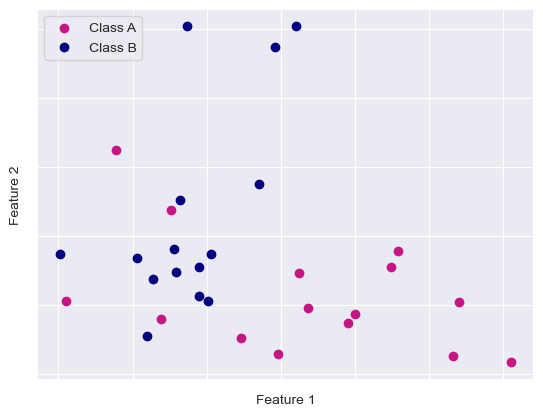

In [4]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# define the colors for each class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}
# group the data based on the label
grouped = df_label.groupby('Label')
class_a = grouped.get_group('Class A')
class_b = grouped.get_group('Class B')

# plot the data
plt.scatter(x=class_a['Feature 1'], y=class_a['Feature 2'], color=colors['class_a'], )
plt.scatter(x=class_b['Feature 1'], y=class_b['Feature 2'], color=colors['class_b'], label='Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Class A', 'Class B'], loc='upper left')
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()


## Multinomial Naive-Bayes Classification

Theory:
* Multinomial Naive-Bayes is a variant of the Naive-Bayes algorithm that is used for classification tasks.
* It is suitable for classification tasks with discrete features (e.g., word counts for text classification).
* The Multinomial Naive-Bayes model is based on the assumption that the features are generated from a simple multinomial distribution
* multinomial distribution is a generalization of the binomial distribution to more than two categories, where each feature represents the frequency of a term in a document, means the frequency of a word in a text, like in our example, the frequency of the word "win" in a spam email or the frequency of the word "meeting" in a non-spam email.
* The model calculates the probability of each label based on the probability of each feature for that label.
* The label with the highest probability is the predicted label for the input data.
* The Multinomial Naive-Bayes model is widely used in text classification tasks, such as spam detection and sentiment analysis.

In [5]:
# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# initiate object Multinomial Naive-Bayes
mnb = MultinomialNB()

# convert the label to 1D array
y = y.ravel()

# Use the synthetic dataset that was created previously
# X: features dataset (Feature 1 and Feature 2)
# y: label dataset (Class A and Class B)
# split the data into training and testing set
# test_size: the proportion of the dataset to include in the test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# train or fit the model
mnb.fit(X_train, y_train)

# predict the label of the training set
y_train_pred = mnb.predict(X_train)
# evaluate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)

# predict the label of the testing set
y_test_pred = mnb.predict(X_test)
# evaluate the accuracy of the model
test_accuracy = accuracy_score(y_test, y_test_pred)

# display the accuracy of the model
print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9047619047619048
Testing Accuracy: 0.5555555555555556


### Visualize The Result of Classification

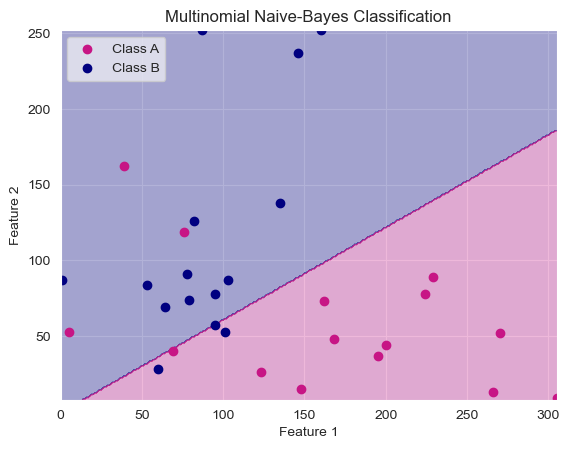

In [6]:
from matplotlib.colors import ListedColormap
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# define the colors for each class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# define the label encoder
le = LabelEncoder()
# fit and transform the label to the encoded label
y_encoded = le.fit_transform(y)

# define the step size for the mesh grid
h = 1
# create the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict the label of the mesh grid
Z = mnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap([colors['class_b'], colors['class_a']]))
# plot the data points
plt.scatter(x=class_a['Feature 1'], y=class_a['Feature 2'], color=colors['class_a'])
plt.scatter(x=class_b['Feature 1'], y=class_b['Feature 2'], color=colors['class_b'])

# set the labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multinomial Naive-Bayes Classification')
plt.legend(['Class A', 'Class B'], loc='upper left')
plt.show()


## Gaussian Naive-Bayes Classfification

Theory:
* Gaussian Naive-Bayes is a variant of the Naive-Bayes algorithm that is used for classification tasks.
* It is suitable for classification tasks with continuous features (e.g., real-valued features).
* The Gaussian Naive-Bayes model is based on the assumption that the features are generated from a simple Gaussian distribution.
* The model calculates the probability of each label based on the probability of each feature for that label.
* The label with the highest probability is the predicted label for the input data.
* The model can be updated continuously with new data, making it suitable for real-time applications.
* The Gaussian Naive-Bayes model is robust to noise and can handle missing values in the dataset.
* The model is suitable for large datasets and can provide good results even with limited training data.
* Disadvantages of the Gaussian Naive-Bayes model include the assumption of feature independence, which may not hold in some cases, and the model's sensitivity to the distribution of the data.
* The model may not perform well with highly correlated features or features with complex relationships.
* The Gaussian Naive-Bayes model is widely used in classification tasks with continuous features, such as medical diagnosis and image recognition.

In [7]:
# Importing necessary libraries
from sklearn.naive_bayes import GaussianNB

# initiate object Gaussian Naive-Bayes
gnb = GaussianNB()

# Use the synthetic dataset that was created previously
# and Use the same training and testing set that was created previously
# train or fit the model
gnb.fit(X_train, y_train)

# predict the label of the training set
y_train_pred_gnb = gnb.predict(X_train)
# evaluate the accuracy of the model
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)

# predict the label of the testing set
y_test_pred_gnb = gnb.predict(X_test)
# evaluate the accuracy of the model
test_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)

# display the accuracy of the model
print(f'Training Accuracy: {train_accuracy_gnb}')
print(f'Testing Accuracy: {test_accuracy_gnb}')

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


### Visualize The Result of Classification

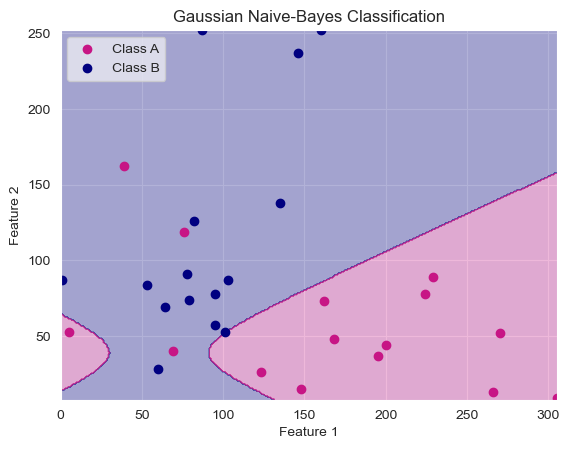

In [8]:
# define the colors for each class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# define the step size for the mesh grid
h = 1
# create the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict the label of the mesh grid
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap([colors['class_b'], colors['class_a']]))
# plot the data points
plt.scatter(x=class_a['Feature 1'], y=class_a['Feature 2'], color=colors['class_a'])
plt.scatter(x=class_b['Feature 1'], y=class_b['Feature 2'], color=colors['class_b'])

# set the labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Naive-Bayes Classification')
plt.legend(['Class A', 'Class B'], loc='upper left')
plt.show()